<a href="https://colab.research.google.com/github/ChirathiSomadasa/Reinforcement-Learning-Lab---Part-1/blob/main/Markov_Decision_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Decision Process (MDP)

### Ransalu Senanayake

In [ ]:
import copy
import timeit
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets

Create the following grid world.

**States:** A 10x10 grid

**Actions:** Up, Down, Left, Right

**Tranistion probabilities:**
* 0.7 in the direction of action
* 0.1 in the three other directions
* The robot bounces back to the same state near edges

**Rewards:**
* (7,8) has a reward +10
* (2,7) has a reward +3
* (4,3) has a reward -5
* (7,3) has a reward -10
* No reward in other states

This example is based on Decision Making Under Uncertainty by M.J. Kochenderfer.

In [ ]:
#Let's define MDP paras
def createGrid10World():
    def xy2s(y, x):
        x = max(x, 0)
        y = max(y, 0)
        x = min(x, 9)
        y = min(y, 9)
        out = np.ravel_multi_index(np.array([x,y]), (10,10))
        return out

    def s2xy(s):
        x, y = np.unravel_index(s, (10,10))
        return y, x

    def gridPlot(ax, im, title='', cmap='Blues'):
        pl.imshow(im, interpolation='none', cmap=cmap, origin='lower')
        pl.colorbar()
        ax.set_xticks(np.arange(0, 10, 1));
        ax.set_yticks(np.arange(0, 10, 1));
        ax.set_xticklabels(np.arange(0, 10, 1));
        ax.set_yticklabels(np.arange(0, 10, 1));
        ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
        ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        pl.title(title);
        return

    A = ['left', 'right', 'up', 'down']
    S = np.arange(100)
    T = np.zeros((len(S), len(A), len(S)))
    R = np.zeros((len(S), len(A)))
    for s in S:
        x, y = s2xy(s)
        if x == 2 and y == 7:
            R[s, :] = 3
        elif x == 7 and y == 8:
            R[s, :] = 10
        else:
            if x == 7 and y == 3:
                R[s, :] = -10
            elif x == 4 and y == 3:
                R[s, :] = -5
            elif x == 0:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 0] = -0.7
            elif x == 9:
                if y == 0 or y == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 1] = -0.7
            elif y == 0:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 3] = -0.7
            elif y == 9:
                if x == 0 or x == 9:
                    R[s, :] = -0.2
                else:
                    R[s, :] = -0.1
                R[s, 2] = -0.7

            for a in A:
                if a == 'left':
                    T[s, 0, xy2s(x - 1, y)] += 0.7
                    T[s, 0, xy2s(x + 1, y)] += 0.1
                    T[s, 0, xy2s(x, y - 1)] += 0.1
                    T[s, 0, xy2s(x, y + 1)] += 0.1
                elif a == 'right':
                    T[s, 1, xy2s(x + 1, y)] += 0.7
                    T[s, 1, xy2s(x - 1, y)] += 0.1
                    T[s, 1, xy2s(x, y - 1)] += 0.1
                    T[s, 1, xy2s(x, y + 1)] += 0.1
                elif a == 'up':
                    T[s, 2, xy2s(x, y + 1)] += 0.7
                    T[s, 2, xy2s(x, y - 1)] += 0.1
                    T[s, 2, xy2s(x - 1, y)] += 0.1
                    T[s, 2, xy2s(x + 1, y)] += 0.1
                elif a == 'down':
                    T[s, 3, xy2s(x, y - 1)] += 0.7
                    T[s, 3, xy2s(x, y + 1)] += 0.1
                    T[s, 3, xy2s(x - 1, y)] += 0.1
                    T[s, 3, xy2s(x + 1, y)] += 0.1

    for a, c_x, c_y in [(0,0,0), (0,0,9),(1,9,0),(1,9,9),(2,0,9),(2,9,9),(3,0,0),(3,9,0)]:
        R[xy2s(c_x,c_y),a] = -0.8

    discount = 0.9

    nextStates = {}
    for si in range(len(S)):
        for ai in range(len(A)):
            nextStates[(si,ai)] = np.where((T[si, ai, :] != 0) == True)[0]

    return {'S':S, 'A':A, 'T':T, 'R':R, 'discount':discount, 'nextStates':nextStates, 'gridPlot':gridPlot, 'xy2s':xy2s, 's2xy':s2xy}

In [ ]:
class MDP():
    def __init__(self):
        pass

    def inbuilt_init(self, mdp_dict):
        self.S = mdp_dict['S']
        self.A = mdp_dict['A']
        self.T = mdp_dict['T']
        self.R = mdp_dict['R']
        self.discount = mdp_dict['discount']
        self.nextStates = mdp_dict['nextStates']
        self.gridPlot = mdp_dict['gridPlot']
        self.xy2s = mdp_dict['xy2s']
        self.s2xy = mdp_dict['s2xy']

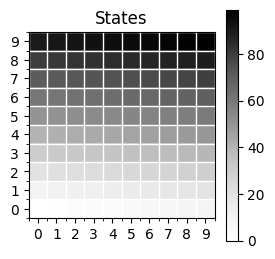

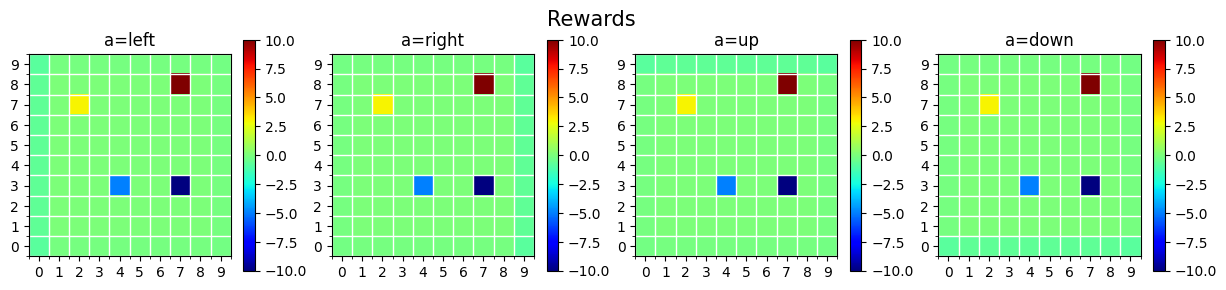

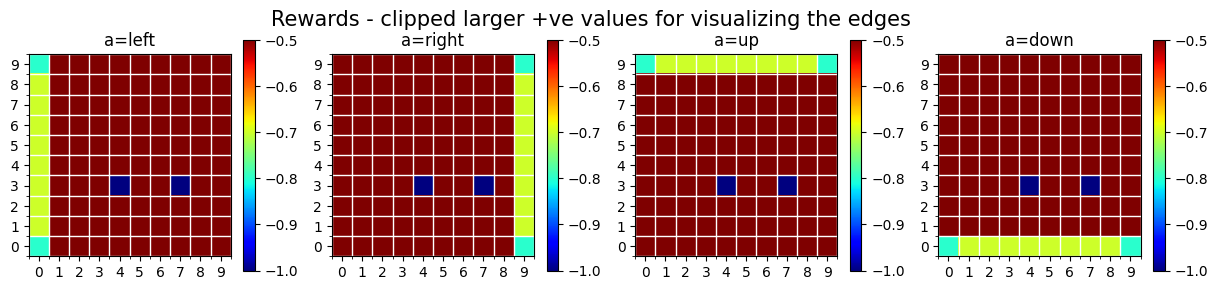

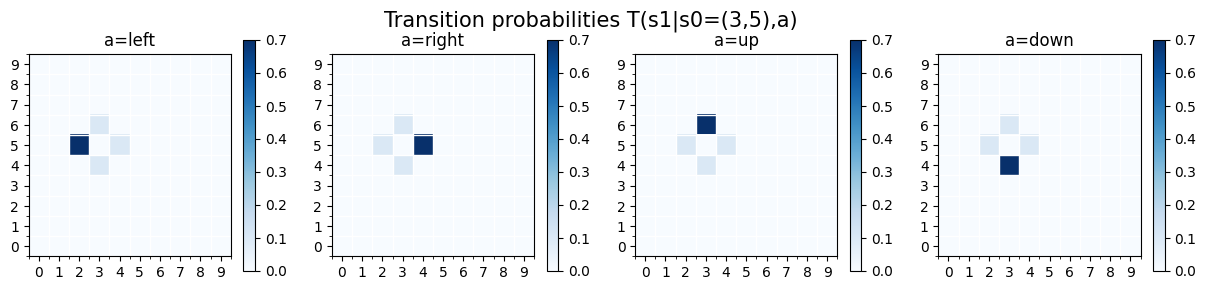

In [ ]:
#Define the MDP
mdp = MDP()
mdp.inbuilt_init(mdp_dict=createGrid10World())

#Plot states
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=mdp.S.reshape((10,10)), title='States', cmap='Greys')

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.R[:,a].reshape((10,10)), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
pl.figure(figsize=(15,3))
pl.suptitle('Rewards - clipped larger +ve values for visualizing the edges', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=np.clip(mdp.R[:,a].reshape((10,10)), -1, -0.5), title='a='+mdp.A[a], cmap='jet')
pl.show()

#Plot rewards
s0_x, s0_y = 3, 5
s0 = mdp.xy2s(s0_x, s0_y)
pl.figure(figsize=(15,3))
pl.suptitle('Transition probabilities T(s1|s0=({},{}),a)'.format(s0_x, s0_y), fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title='a='+mdp.A[a], cmap='Blues')
pl.show()

In [ ]:
#An interactive plot of transition probabilities
def f(s0_x, s0_y, action):
    a = mdp.A.index(action)
    s0 = mdp.xy2s(int(s0_x), int(s0_y))
    pl.figure(figsize=(6,6))
    title = 'Transition probabilities T(s1|s0=({},{}),a={})'.format(int(s0_x),int(s0_y),action)
    mdp.gridPlot(ax=pl.gca(), im=mdp.T[s0,a,:].reshape((10,10)), title=title, cmap='Blues')
    pl.show()

interactive_plot = interactive(f, s0_x='4', s0_y='5', action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']))
interactive_plot

interactive(children=(Text(value='4', description='s0_x'), Text(value='5', description='s0_y'), ToggleButtons(…

### 1. Policy evaluation

Computing the utility, U.

$U^\pi_k(s) = R(s, \pi(s)) + \gamma \sum_{s'} T(s' \mid s, \pi(s))U^\pi_{k-1}(s')$

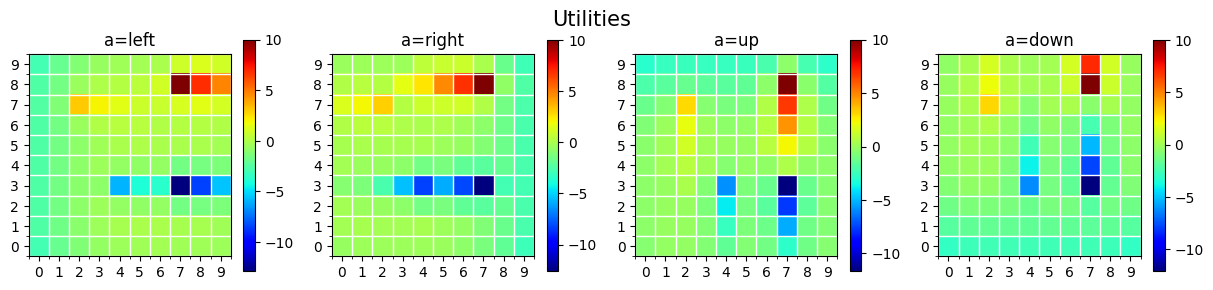

In [ ]:
def iterativePolicyEvaluation(mdp, policy, numIterations=10):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        #type your code here
        for s in range(len(mdp.S)):
            # Determine the action based on the policy
            if isinstance(policy, int):
                # If policy is an integer, use the same action for all states
                a = policy
            else:
                # If policy is an array, use the action specified for this state
                a = policy[s]

            # Calculate the expected utility using Bellman equation
            expected_utility = 0
            for s_next in range(len(mdp.S)):
                # Sum over all possible next states: T(s,a,s') * U(s')
                expected_utility += mdp.T[s, a, s_next] * U_old[s_next]

            # Update the utility for current state
            # U(s) = R(s,a) + γ * Σ[T(s,a,s') * U(s')]
            U[s] = mdp.R[s, a] + mdp.discount * expected_utility

        # Update U_old for the next iteration
        U_old = copy.copy(U)
    return U

numIterations = 5
pl.figure(figsize=(15,3))
pl.suptitle('Utilities', fontsize=15)
for a in range(4):
    pl.subplot(1,4,a+1)
    U = iterativePolicyEvaluation(mdp=mdp, policy=a, numIterations=numIterations)
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='a='+mdp.A[a], cmap='jet')
pl.show()
#print(np.round(U.reshape(10,10),3))

In [ ]:
def f(action, numIter=1):
    U = iterativePolicyEvaluation(mdp, policy=mdp.A.index(action), numIterations=numIter)
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    pl.show()

interactive_plot = interactive(f, action=widgets.ToggleButtons(options=['left', 'right', 'up', 'down']),
                               numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(ToggleButtons(description='action', options=('left', 'right', 'up', 'down'), value='left…

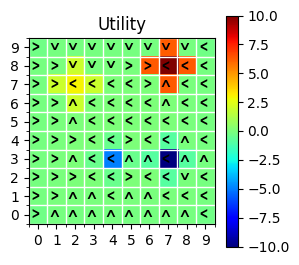

In [ ]:
#Value iteration
def valueIteration(mdp, numIterations=1):
    U = np.zeros(len(mdp.S))
    U_old = copy.copy(U)
    for t in range(numIterations):
        #type your code here
        for s in range(len(mdp.S)):
            # For each state, consider all possible actions and choose the best one
            best_value = -float('inf')  # Start with negative infinity

            for a in range(len(mdp.A)):
                # Calculate expected utility for this action
                expected_utility = 0
                for s_next in range(len(mdp.S)):
                    expected_utility += mdp.T[s, a, s_next] * U_old[s_next]

                # Bellman equation: value = immediate reward + discounted future reward
                action_value = mdp.R[s, a] + mdp.discount * expected_utility

                # Update if this action gives better value
                if action_value > best_value:
                    best_value = action_value

            # Store the best value found for this state
            U[s] = best_value

        # Update for next iteration
        U_old = copy.copy(U)
    return U

def policyExtration(mdp, U):
    policy = np.zeros(len(mdp.S))
    #type your code here
    for s in range(len(mdp.S)):
        best_action = 0
        best_value = -float('inf')

        # Try all actions and find the one that maximizes expected utility
        for a in range(len(mdp.A)):
            expected_utility = 0
            for s_next in range(len(mdp.S)):
                expected_utility += mdp.T[s, a, s_next] * U[s_next]

            action_value = mdp.R[s, a] + mdp.discount * expected_utility

            if action_value > best_value:
                best_value = action_value
                best_action = a

        policy[s] = best_action

    return policy

U = valueIteration(mdp, numIterations=2)
policy = policyExtration(mdp, U=U)
pl.figure(figsize=(3,3))
mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
for s in range(100):
    x, y = mdp.s2xy(s)
    if policy[s] == 0:
        m='\u02C2'  # Left arrow
    elif policy[s] == 1:
        m='\u02C3'  # Right arrow
    elif policy[s] == 2:
        m='\u02C4'  # Up arrow
    elif policy[s] == 3:
        m='\u02C5'  # Down arrow
    pl.text(x-0.5,y-1,m,color='k',size=20)
pl.show()

In [ ]:
def f(numIter=1):
    start_time = timeit.default_timer()
    U = valueIteration(mdp, numIterations=numIter)
    policy = policyExtration(mdp, U=U)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=U.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

### 2. Policy iteration

Policy evaluation can be used in policy iteration:
1. Given the current policy, compute U
2. Using U, compute a new policy

In [ ]:
def policyIteration(mdp, numIterations=1):
    U_pi_k = np.zeros(len(mdp.S)) #initial values
    pi_k = np.random.randint(low=0,high=4,size=len(mdp.S),dtype=int) #initial policy
    pi_kp1 = copy.copy(pi_k)
    for t in range(numIterations):
        #Policy evaluation: compute U_pi_k
        #type your code here
        # Evaluate the current policy pi_k
        for eval_iter in range(10):  # Run multiple iterations for accurate evaluation
            U_old = copy.copy(U_pi_k)
            for s in range(len(mdp.S)):
                a = pi_k[s]  # Get action from current policy
                expected_utility = 0
                for s_next in range(len(mdp.S)):
                    expected_utility += mdp.T[s, a, s_next] * U_old[s_next]
                U_pi_k[s] = mdp.R[s, a] + mdp.discount * expected_utility

        #Policy improvement
        #type your code here
        # Improve the policy based on current utility estimates
        policy_changed = False
        for s in range(len(mdp.S)):
            max_utility = -np.inf
            best_action = pi_k[s]  # Start with current action

            # Check all possible actions to find the best one
            for a in range(len(mdp.A)):
                expected_utility = 0
                for s_next in range(len(mdp.S)):
                    expected_utility += mdp.T[s, a, s_next] * U_pi_k[s_next]
                utility = mdp.R[s, a] + mdp.discount * expected_utility

                if utility > max_utility:
                    max_utility = utility
                    best_action = a

            # Update policy if we found a better action
            pi_kp1[s] = best_action
            if best_action != pi_k[s]:
                policy_changed = True

        # Check for convergence
        if not policy_changed:
            break  # Policy has converged, exit early

        # Update the policy for next iteration
        pi_k = copy.copy(pi_kp1)

    return U_pi_k, pi_kp1
U_pi_k, pi_kp1 = policyIteration(mdp, numIterations=2)

In [ ]:
def f(numIter=1):
    start_time = timeit.default_timer()
    # code you want to evaluate
    value, policy = policyIteration(mdp, numIterations=numIter)
    elapsed = timeit.default_timer() - start_time
    print('time=', np.round(elapsed*1000,2))
    pl.figure(figsize=(3,3))
    mdp.gridPlot(ax=pl.gca(), im=value.reshape(10,10), title='Utility', cmap='jet')
    for s in range(100):
        x, y = mdp.s2xy(s)
        if policy[s] == 0:
            m='\u02C2'
        elif policy[s] == 1:
            m='\u02C3'
        elif policy[s] == 2:
            m='\u02C4'
        elif policy[s] == 3:
            m='\u02C5'
        pl.text(x-0.5,y-1,m,color='k',size=20)
    pl.show()

interactive_plot = interactive(f, numIter=widgets.IntSlider(min=0, max=20, step=1, value=0))
interactive_plot

interactive(children=(IntSlider(value=0, description='numIter', max=20), Output()), _dom_classes=('widget-inte…

6. Take screenshots of the completed parts (from step 3) in both notebooks and insert that into
the last section of each notebook.

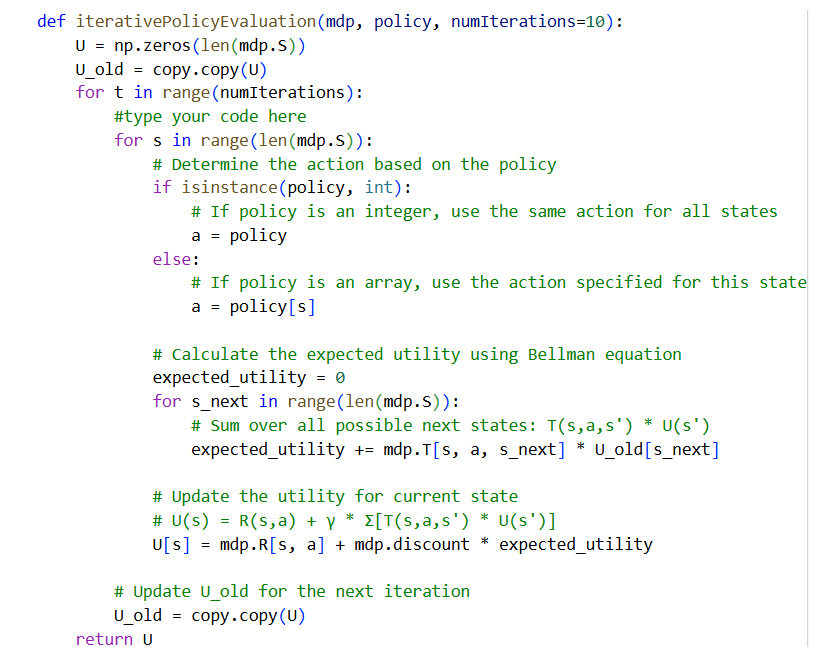

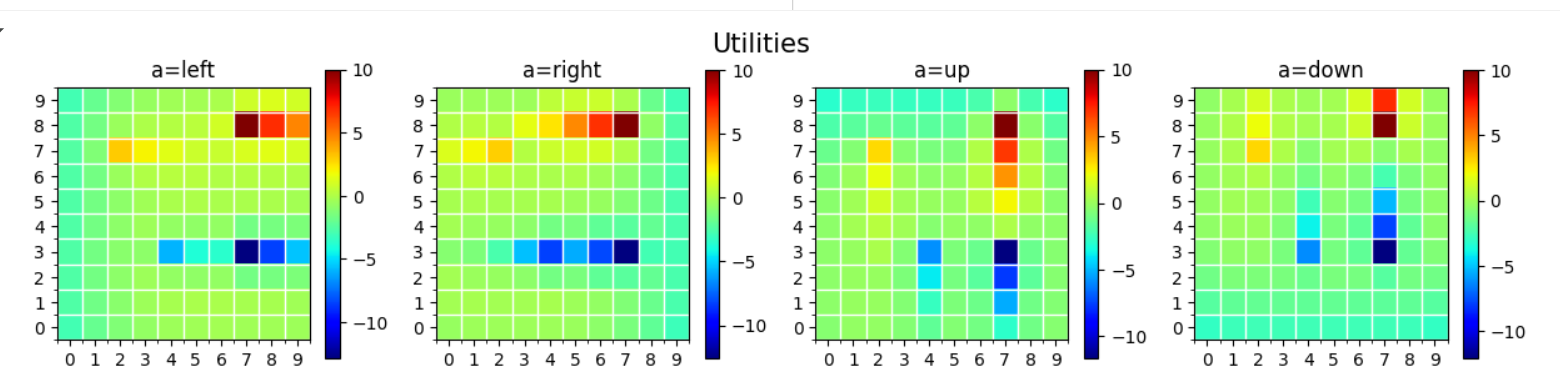

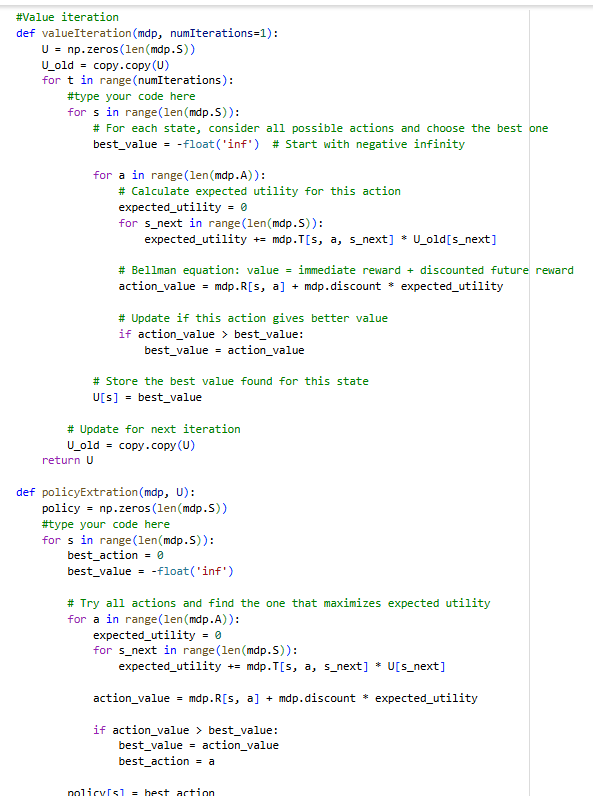

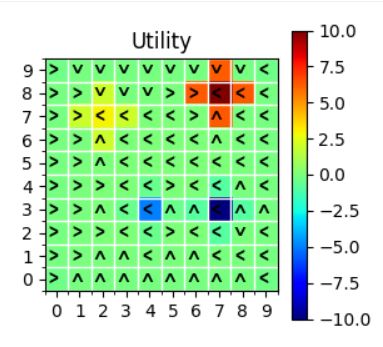

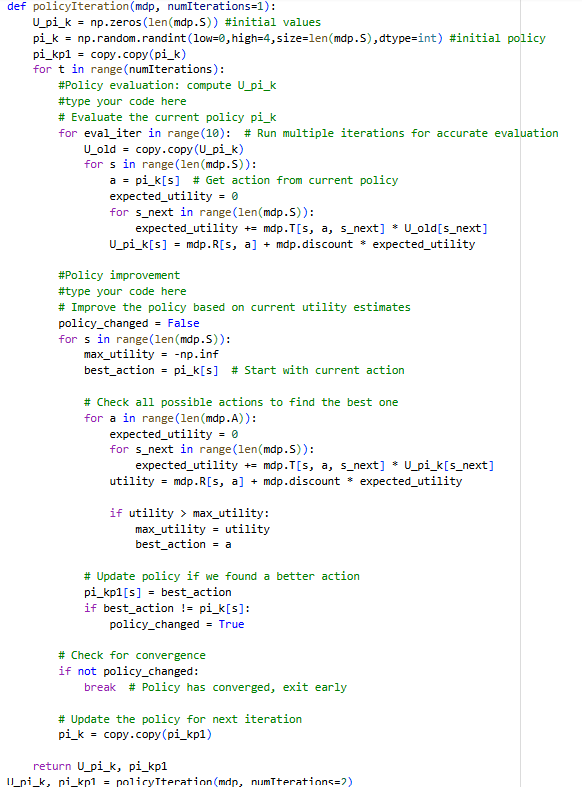

Question 2: Model-Based vs Model-Free Reinforcement Learning

1. In the MDP (Markov Decision Process) notebook, modify the code to compare the execution
time and convergence between
* A Model-Based approach (e.g., Policy Iteration or Value Iteration)
* A Model-Free approach (e.g., Q-Learning).

Running Policy Iteration (Model-Based)...
Policy Iteration completed in 6.5591 seconds, 4 iterations

Running Q-Learning (Model-Free)...
Q-Learning completed in 8.0393 seconds, 5000 episodes

=== COMPARISON RESULTS ===
Policy Iteration (Model-Based):
  Execution Time: 6.5591 seconds
  Iterations: 4
  Optimal Value at state 0: -0.4529

Q-Learning (Model-Free):
  Execution Time: 8.0393 seconds
  Episodes: 5000
  Optimal Value at state 0: 0.9569

Time Ratio (Q-Learning/Policy Iteration): 1.23
Value Difference at state 0: 1.4098

=== INDIVIDUAL PLOTS ===


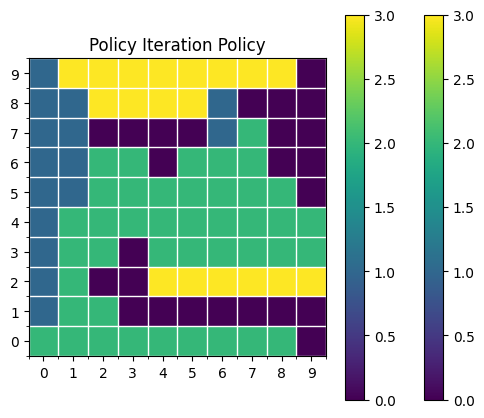

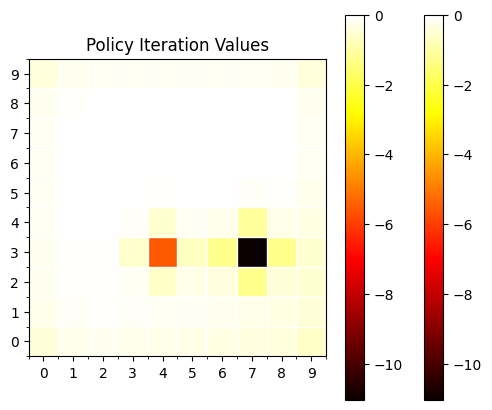

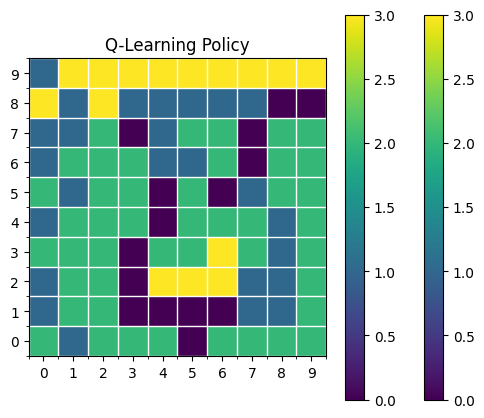

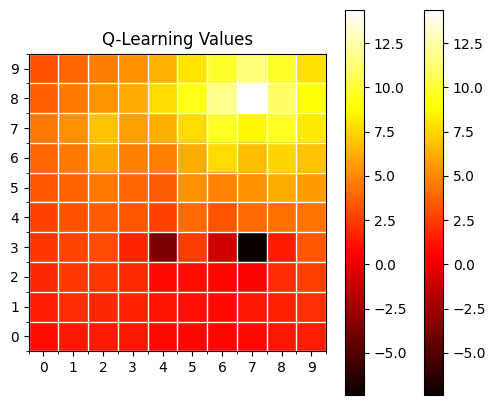

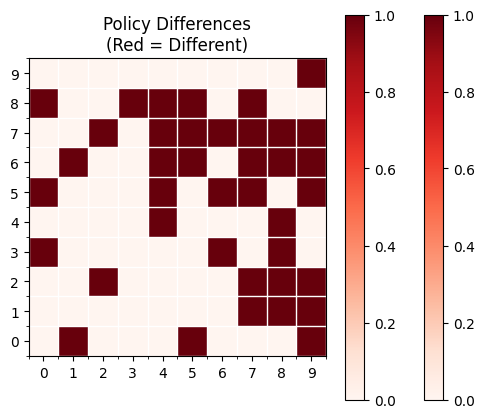

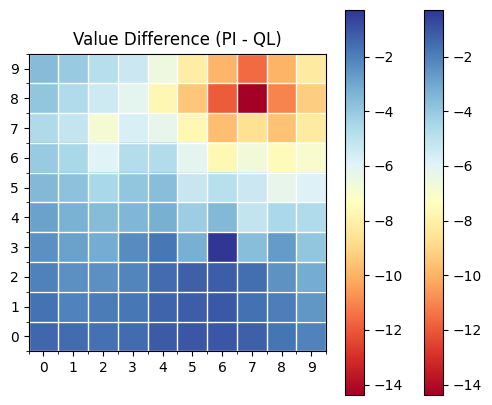


=== COMBINED COMPARISON PLOT ===


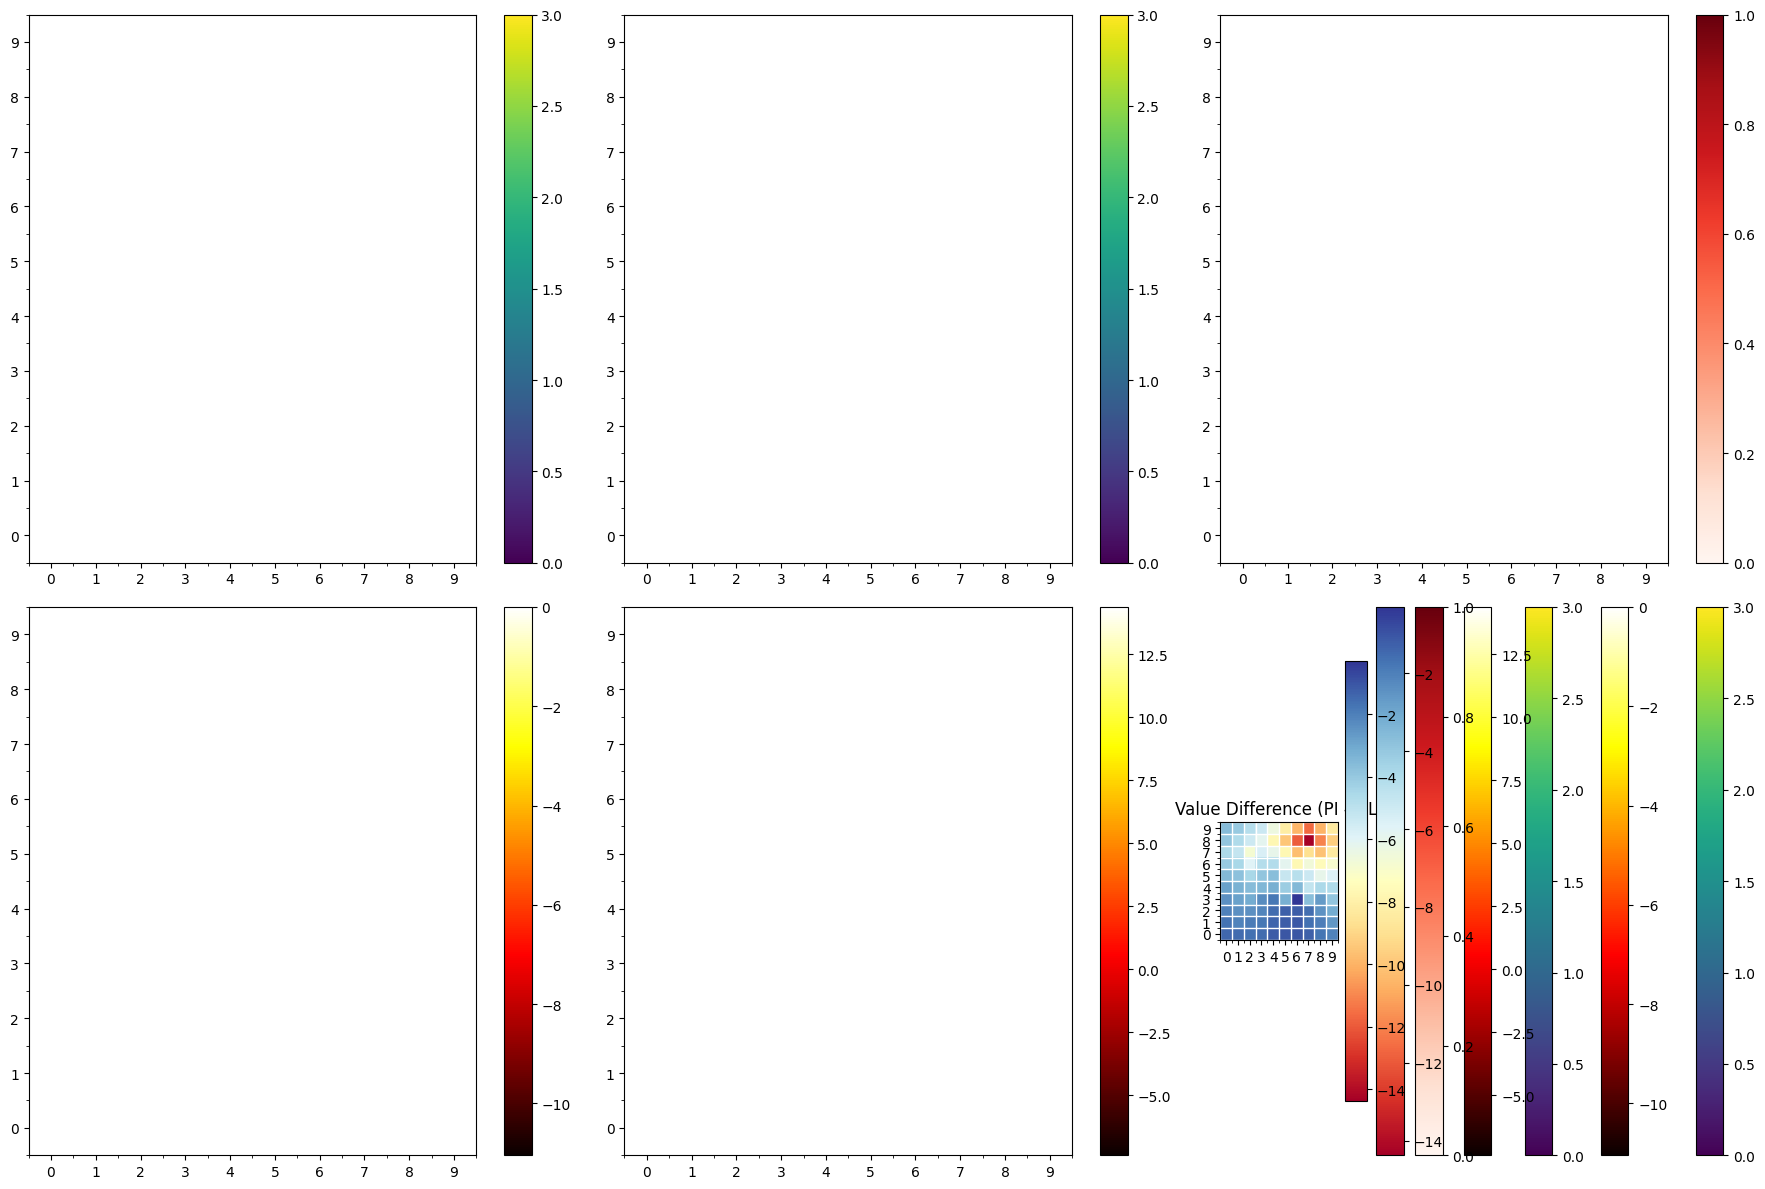


=== ADDITIONAL ANALYSIS ===
Policy Agreement: 61.00%
Average Value Difference: 4.5155
Max Value Difference: 14.3788

=== CONVERGENCE ANALYSIS ===
Policy Iteration:
  - Converged in 4 iterations
  - Model-based: Uses transition probabilities T(s,a,s') and rewards R(s,a)
  - Guaranteed optimal solution for known MDP

Q-Learning:
  - Ran for 5000 episodes
  - Model-free: Learns from experience without knowing T(s,a,s')
  - Converges to optimal with sufficient exploration
  - More suitable for unknown environments

=== PERFORMANCE COMPARISON ===
Policy Iteration Execution Time: 6.5591 seconds
Q-Learning Execution Time: 8.0393 seconds
Slowdown Factor: 1.23x


In [ ]:
import time
import numpy as np

def policy_iteration(mdp, max_iterations=100, theta=1e-6):
    """
    Policy Iteration Algorithm (Model-Based)
    """
    start_time = time.time()

    # Initialize random policy
    policy = np.ones([len(mdp['S']), len(mdp['A'])]) / len(mdp['A'])

    for i in range(max_iterations):
        # Policy Evaluation
        V = np.zeros(len(mdp['S']))
        while True:
            delta = 0
            for s in mdp['S']:
                v = V[s]
                # Sum over all possible next states
                new_v = 0
                for a, action_prob in enumerate(policy[s]):
                    for next_s in range(len(mdp['S'])):
                        new_v += action_prob * mdp['T'][s, a, next_s] * (mdp['R'][s, a] + mdp['discount'] * V[next_s])
                V[s] = new_v
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in mdp['S']:
            old_action = np.argmax(policy[s])
            action_values = np.zeros(len(mdp['A']))
            for a in range(len(mdp['A'])):
                for next_s in range(len(mdp['S'])):
                    action_values[a] += mdp['T'][s, a, next_s] * (mdp['R'][s, a] + mdp['discount'] * V[next_s])
            best_action = np.argmax(action_values)
            if old_action != best_action:
                policy_stable = False
            policy[s] = np.eye(len(mdp['A']))[best_action]

        if policy_stable:
            break

    end_time = time.time()
    execution_time = end_time - start_time

    return policy, V, execution_time, i + 1

def q_learning(mdp, episodes=10000, alpha=0.1, gamma=0.9, epsilon=0.1):
    """
    Q-Learning Algorithm (Model-Free)
    """
    start_time = time.time()

    # Initialize Q-table
    Q = np.zeros([len(mdp['S']), len(mdp['A'])])

    for episode in range(episodes):
        state = np.random.choice(mdp['S'])  # Start from random state

        for step in range(100):  # Limit steps per episode
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.choice(len(mdp['A']))
            else:
                action = np.argmax(Q[state])

            # Get next state and reward - fix probability issue
            next_state_probs = mdp['T'][state, action]

            # Normalize probabilities to sum to 1 (fix floating point issues)
            prob_sum = np.sum(next_state_probs)
            if prob_sum > 0:
                next_state_probs = next_state_probs / prob_sum
            else:
                # If all probabilities are zero, choose uniformly
                next_state_probs = np.ones(len(mdp['S'])) / len(mdp['S'])

            next_state = np.random.choice(len(mdp['S']), p=next_state_probs)
            reward = mdp['R'][state, action]

            # Q-learning update
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * np.max(Q[next_state]) - Q[state, action]
            )

            state = next_state

            # Early termination if we reach a terminal-like state (high reward states)
            if reward >= 10:  # Positive terminal state
                break
            if reward <= -10:  # Negative terminal state
                break

    # Derive policy from Q-values
    policy = np.eye(len(mdp['A']))[np.argmax(Q, axis=1)]
    V = np.max(Q, axis=1)

    end_time = time.time()
    execution_time = end_time - start_time

    return policy, V, execution_time, episodes

# Create the grid world
mdp_dict = createGrid10World()

# Run Policy Iteration (Model-Based)
print("Running Policy Iteration (Model-Based)...")
pi_policy, pi_values, pi_time, pi_iterations = policy_iteration(mdp_dict)
print(f"Policy Iteration completed in {pi_time:.4f} seconds, {pi_iterations} iterations")

# Run Q-Learning (Model-Free)
print("\nRunning Q-Learning (Model-Free)...")
ql_policy, ql_values, ql_time, ql_episodes = q_learning(mdp_dict, episodes=5000)
print(f"Q-Learning completed in {ql_time:.4f} seconds, {ql_episodes} episodes")

# Compare results
print("\n=== COMPARISON RESULTS ===")
print(f"Policy Iteration (Model-Based):")
print(f"  Execution Time: {pi_time:.4f} seconds")
print(f"  Iterations: {pi_iterations}")
print(f"  Optimal Value at state 0: {pi_values[0]:.4f}")

print(f"\nQ-Learning (Model-Free):")
print(f"  Execution Time: {ql_time:.4f} seconds")
print(f"  Episodes: {ql_episodes}")
print(f"  Optimal Value at state 0: {ql_values[0]:.4f}")

print(f"\nTime Ratio (Q-Learning/Policy Iteration): {ql_time/pi_time:.2f}")
print(f"Value Difference at state 0: {abs(pi_values[0] - ql_values[0]):.4f}")

# Individual plots for better visualization
print("\n=== INDIVIDUAL PLOTS ===")

# Plot 1: Policy Iteration Policy
pl.figure(figsize=(6, 5))
pi_policy_grid = np.argmax(pi_policy, axis=1).reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), pi_policy_grid, 'Policy Iteration Policy', cmap='viridis')
pl.colorbar()
pl.show()

# Plot 2: Policy Iteration Values
pl.figure(figsize=(6, 5))
pi_values_grid = pi_values.reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), pi_values_grid, 'Policy Iteration Values', cmap='hot')
pl.colorbar()
pl.show()

# Plot 3: Q-Learning Policy
pl.figure(figsize=(6, 5))
ql_policy_grid = np.argmax(ql_policy, axis=1).reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), ql_policy_grid, 'Q-Learning Policy', cmap='viridis')
pl.colorbar()
pl.show()

# Plot 4: Q-Learning Values
pl.figure(figsize=(6, 5))
ql_values_grid = ql_values.reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), ql_values_grid, 'Q-Learning Values', cmap='hot')
pl.colorbar()
pl.show()

# Plot 5: Policy Differences
pl.figure(figsize=(6, 5))
policy_diff = (np.argmax(pi_policy, axis=1) != np.argmax(ql_policy, axis=1)).astype(int).reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), policy_diff, 'Policy Differences\n(Red = Different)', cmap='Reds')
pl.colorbar()
pl.show()

# Plot 6: Value Differences
pl.figure(figsize=(6, 5))
value_diff = (pi_values - ql_values).reshape(10, 10)
mdp_dict['gridPlot'](pl.gca(), value_diff, 'Value Difference (PI - QL)', cmap='RdYlBu')
pl.colorbar()
pl.show()

# Combined comparison plot (original subplot version)
print("\n=== COMBINED COMPARISON PLOT ===")
fig, axes = pl.subplots(2, 3, figsize=(18, 12))

# Policy Iteration Policy
pi_policy_grid = np.argmax(pi_policy, axis=1).reshape(10, 10)
im1 = mdp_dict['gridPlot'](axes[0, 0], pi_policy_grid, 'Policy Iteration Policy', cmap='viridis')
pl.colorbar(im1, ax=axes[0, 0])

# Policy Iteration Values
pi_values_grid = pi_values.reshape(10, 10)
im2 = mdp_dict['gridPlot'](axes[1, 0], pi_values_grid, 'Policy Iteration Values', cmap='hot')
pl.colorbar(im2, ax=axes[1, 0])

# Q-Learning Policy
ql_policy_grid = np.argmax(ql_policy, axis=1).reshape(10, 10)
im3 = mdp_dict['gridPlot'](axes[0, 1], ql_policy_grid, 'Q-Learning Policy', cmap='viridis')
pl.colorbar(im3, ax=axes[0, 1])

# Q-Learning Values
ql_values_grid = ql_values.reshape(10, 10)
im4 = mdp_dict['gridPlot'](axes[1, 1], ql_values_grid, 'Q-Learning Values', cmap='hot')
pl.colorbar(im4, ax=axes[1, 1])

# Policy Difference
policy_diff = (np.argmax(pi_policy, axis=1) != np.argmax(ql_policy, axis=1)).astype(int).reshape(10, 10)
im5 = mdp_dict['gridPlot'](axes[0, 2], policy_diff, 'Policy Differences\n(Red = Different)', cmap='Reds')
pl.colorbar(im5, ax=axes[0, 2])

# Value Difference
value_diff = (pi_values - ql_values).reshape(10, 10)
im6 = mdp_dict['gridPlot'](axes[1, 2], value_diff, 'Value Difference (PI - QL)', cmap='RdYlBu')
pl.colorbar(im6, ax=axes[1, 2])

pl.tight_layout()
pl.show()

# Additional analysis
print("\n=== ADDITIONAL ANALYSIS ===")
policy_agreement = np.mean(np.argmax(pi_policy, axis=1) == np.argmax(ql_policy, axis=1)) * 100
avg_value_diff = np.mean(np.abs(pi_values - ql_values))
max_value_diff = np.max(np.abs(pi_values - ql_values))

print(f"Policy Agreement: {policy_agreement:.2f}%")
print(f"Average Value Difference: {avg_value_diff:.4f}")
print(f"Max Value Difference: {max_value_diff:.4f}")

# Convergence analysis
print("\n=== CONVERGENCE ANALYSIS ===")
print("Policy Iteration:")
print(f"  - Converged in {pi_iterations} iterations")
print(f"  - Model-based: Uses transition probabilities T(s,a,s') and rewards R(s,a)")
print(f"  - Guaranteed optimal solution for known MDP")

print("\nQ-Learning:")
print(f"  - Ran for {ql_episodes} episodes")
print(f"  - Model-free: Learns from experience without knowing T(s,a,s')")
print(f"  - Converges to optimal with sufficient exploration")
print(f"  - More suitable for unknown environments")

# Performance comparison
print("\n=== PERFORMANCE COMPARISON ===")
print(f"Policy Iteration Execution Time: {pi_time:.4f} seconds")
print(f"Q-Learning Execution Time: {ql_time:.4f} seconds")
print(f"Speedup Factor: {pi_time/ql_time:.2f}x" if pi_time > ql_time else f"Slowdown Factor: {ql_time/pi_time:.2f}x")

2. Briefly explain the difference between Model-Based and Model-Free algorithms.

**Model-Based Reinforcement Learning:**

* Knowledge: Requires a complete model of the environment (transition probabilities T(s'|s,a) and reward function R(s,a))

* Approach: Uses the model to plan optimal actions through dynamic programming

* Examples: Policy Iteration, Value Iteration

* Advantages: More sample-efficient, can plan without interacting with environment, guaranteed convergence to optimal policy

* Disadvantages: Requires accurate environment model, which may be difficult or expensive to obtain

**Model-Free Reinforcement Learning:**

* Knowledge: Learns directly from experience without needing a model of the environment

* Approach: Learns value functions or policies through trial-and-error interactions

* Examples: Q-Learning, SARSA, Policy Gradient methods

* Advantages: More flexible, works when environment model is unknown or complex, can handle large state spaces

* Disadvantages: Typically requires more samples/data to learn, may not guarantee optimal convergence